#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Actividad de la Semana 8**
###**Máquina de Vector Soporte - Support Vector Machine(SVM)**


**Nombres y matrículas de los integrantes del equipo:**

*   Jorge Luis Tapia Peñaloza A01793013
*   Daniela Parra García A01633687
*   Christian Suárez Gil A01793933
*   Jessica Paola Pulido Vásquez A01793650

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import os
import numpy as np
from numpy import arange
from numpy import argmax
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt 
#from dataprep.eda import create_report
import sklearn
from sklearn import datasets, svm
from sklearn.preprocessing import FunctionTransformer, power_transform, OneHotEncoder, MinMaxScaler  
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, make_scorer, confusion_matrix, plot_roc_curve, recall_score, roc_auc_score, RocCurveDisplay, accuracy_score, f1_score, precision_score   
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_validate, GridSearchCV,learning_curve,validation_curve
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from collections import Counter
from sklearn.svm import SVC
from imblearn.metrics import geometric_mean_score


#**Ejercicio-1.** 

In [ ]:
from google.colab import drive

drive.mount("/content/drive/")
DIR = "/content/drive/MyDrive/Australian_Data"
os.chdir(DIR)
df= pd.read_csv("australian.dat", sep = " ", header= None)
df

Mounted at /content/drive/


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state =0)

#**Ejercicio-2.**

In [ ]:
categorical_features = [3,4,5,11]
numerical_features = [1,2,6,9,12,13]
binary_features = [0,7,8,10]
target = [14]



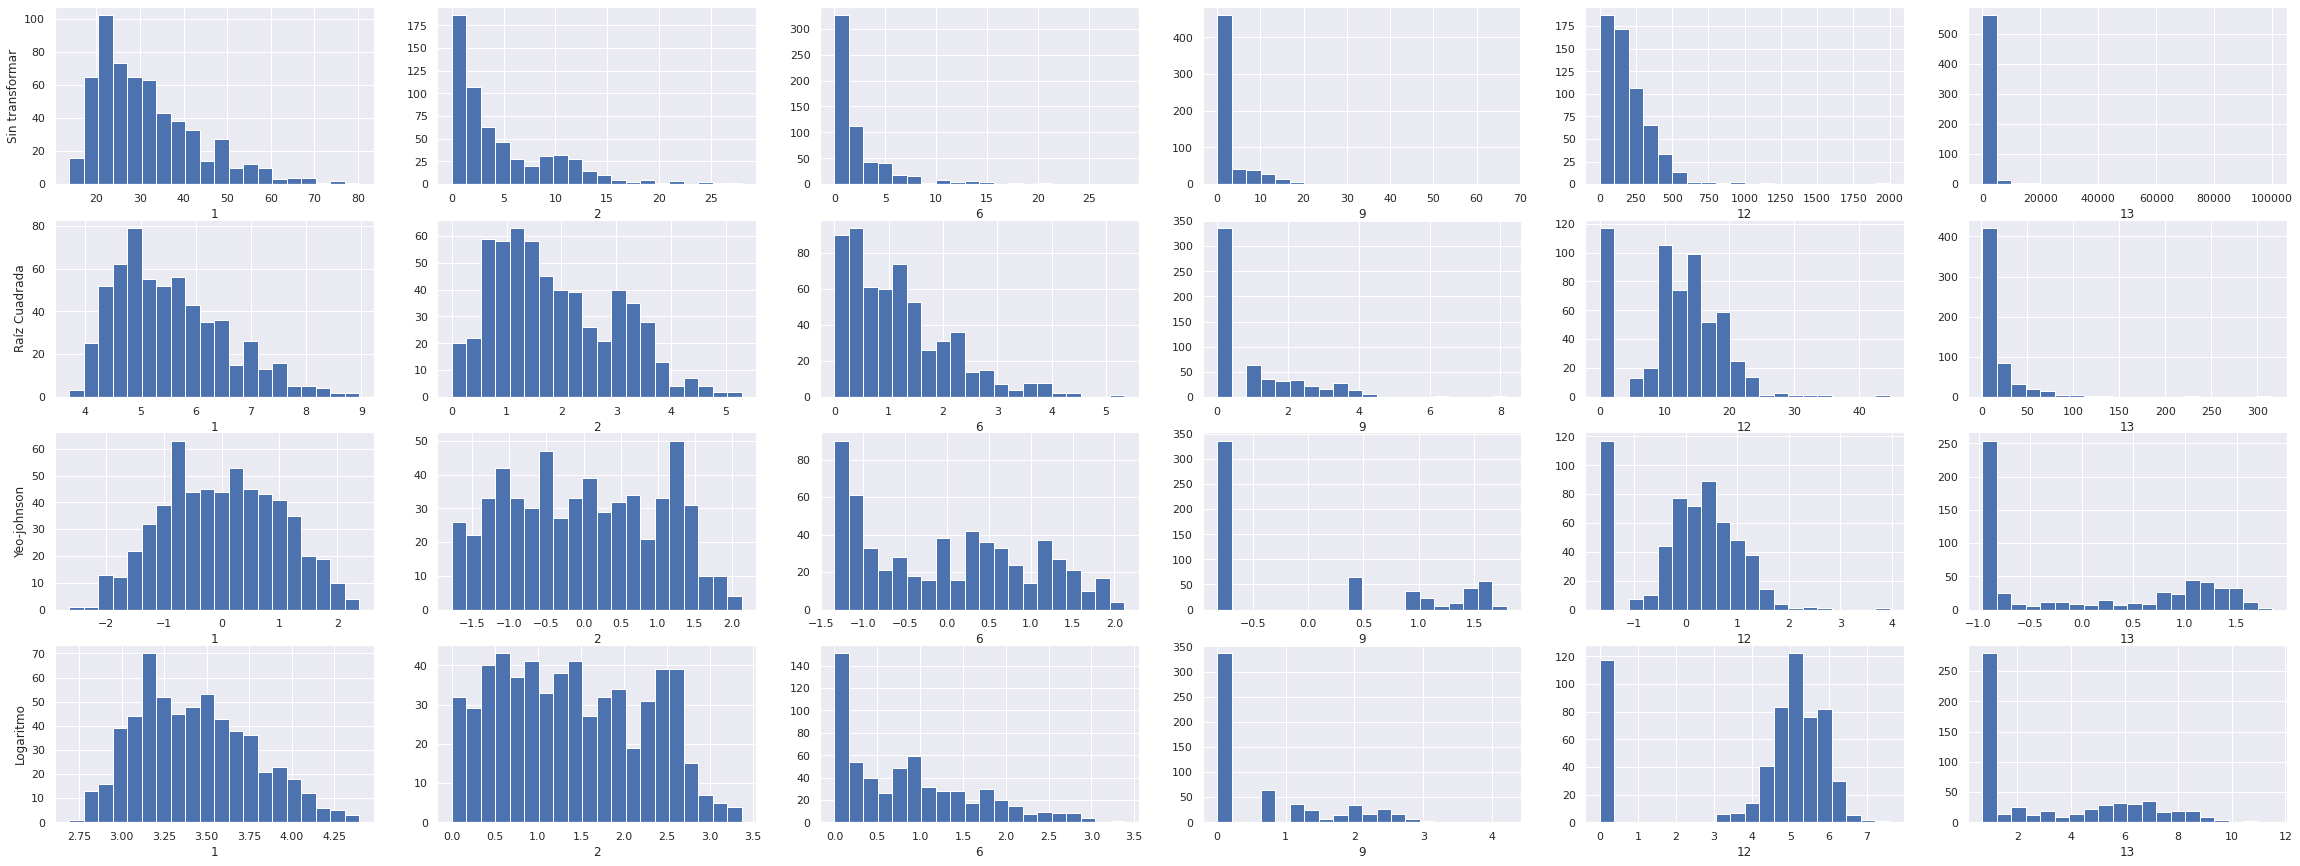

In [ ]:
sns.set(rc={'figure.figsize':(40,15)})
k=0
fig,axes = plt.subplots(4,6)
for k in range(0,6):
  plt.subplot(4,6,k+1)
  Transf0=X_train[numerical_features].iloc[:,k].to_numpy().reshape(-1,1)
  plt.hist(Transf0, bins=20)
  plt.xlabel(numerical_features[k])
  if k==0:
    plt.ylabel('Sin transformar')

  plt.subplot(4,6,k+7)
  Transf1=np.sqrt(Transf0)
  plt.hist(Transf1, bins=20)
  plt.xlabel(numerical_features[k])
  if k==0:
    plt.ylabel('Raíz Cuadrada')  

  plt.subplot(4,6,k+13)
  Transf1= power_transform(Transf0, method='yeo-johnson')
  plt.hist(Transf1, bins=20)
  plt.xlabel(numerical_features[k])
  if k==0:
    plt.ylabel('Yeo-johnson')  

  plt.subplot(4,6,k+19)
  Transf2=np.log(1+Transf0)
  plt.hist(Transf2, bins=20)
  plt.xlabel(numerical_features[k])
  if k==0:
    plt.ylabel('Logaritmo')  

In [ ]:
num_prepro_pipeline = Pipeline(steps = [('imputar', SimpleImputer(strategy='mean')),
                                        ('escalar', MinMaxScaler(feature_range=(1,2)))
                                        ]) 
log_pipe = Pipeline(steps = [('pipeline',num_prepro_pipeline), ('transformacion', FunctionTransformer(lambda x : np.log(1+x), validate=False))])

sqrt_pipe = Pipeline(steps = [('pipeline',num_prepro_pipeline), ('transformacion', FunctionTransformer(np.sqrt))])

cat_prepro_pipeline = Pipeline(steps = [('imputar',SimpleImputer(strategy='most_frequent')),
                                        ('OneHotE', OneHotEncoder(drop = 'first', handle_unknown = 'ignore'))])

bin_prepro_pipeline = Pipeline(steps = [('imputar',SimpleImputer(strategy='most_frequent'))])    

col_transformer = ColumnTransformer(transformers = [
                                                    ('proce_num', num_prepro_pipeline , [9,12]),
                                                    ('proce_num_log', log_pipe , [1]),
                                                    ('proce_num_sqrt', sqrt_pipe , [2,6,13]),
                                                    ('proce_cat', cat_prepro_pipeline , categorical_features),
                                                    ('proce_bin', bin_prepro_pipeline , binary_features)],
                                                     remainder='passthrough')

#**Ejercicio-3.**

In [ ]:
dummy_class = DummyClassifier(strategy="stratified")
pipe_model = Pipeline(steps=[('ct',col_transformer),('model',dummy_class)])
pipe_model.fit(X_train, y_train)


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('proce_num',
                                                  Pipeline(steps=[('imputar',
                                                                   SimpleImputer()),
                                                                  ('escalar',
                                                                   MinMaxScaler(feature_range=(1,
                                                                                               2)))]),
                                                  [9, 12]),
                                                 ('proce_num_log',
                                                  Pipeline(steps=[('pipeline',
                                                                   Pipeline(steps=[('imputar',
                                                                                    SimpleImputer()),
         

In [ ]:
y_pred_train = pipe_model.predict(X_train)
y_pred_test = pipe_model.predict(X_test)

print("Train")
print("Accuaracy = %0.3f" % accuracy_score(y_train,y_pred_train))
print("f1-score = %0.3f" % f1_score(y_train,y_pred_train))
print("Precission = %0.3f" % precision_score(y_train,y_pred_train))
print("Recall = %0.3f" % recall_score(y_train,y_pred_train))

print("\nTest")
print("Accuaracy = %0.3f" % accuracy_score(y_test,y_pred_test))
print("f1-score = %0.3f" % f1_score(y_test,y_pred_test))
print("Precission = %0.3f" % precision_score(y_test,y_pred_test))
print("Recall = %0.3f" % recall_score(y_test,y_pred_test))

Train
Accuaracy = 0.536
f1-score = 0.462
Precission = 0.478
Recall = 0.448

Test
Accuaracy = 0.587
f1-score = 0.517
Precission = 0.535
Recall = 0.500


¿Por qué consideras que es adecuado usar la estrategia “stratified” en este caso?

La estrategia *Stratified* es usada cuando las clases estan balanceadas, el cual es nuestro caso, dada la indicación de la fuente:

Class Distribution
  
    +: 307 (44.5%)    CLASS 2
    -: 383 (55.5%)    CLASS 1


#**Ejercicio-4.**

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

svc = SVC()
pipe_model = Pipeline(steps=[('ct',col_transformer),('model',svc)])

dict_grid = {'model__C':[0.001,0.01,0.1, 1, 10,20], 
             'model__gamma':[0.0001, 0.001, 0.01, 0.1,0.2,0.5,1,10],
             'model__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], 
             'model__probability': [True, False], 
             'model__shrinking': [True, False],
             'model__break_ties': [True, False]
             }

grid = GridSearchCV(estimator= pipe_model, 
                    param_grid=dict_grid, 
                    cv=cv, 
                    scoring=['accuracy','f1','precision','recall'],
                    refit='accuracy',
                    n_jobs = -1,
                    verbose=2
                    )

grid.fit(X_train, y_train)

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Fitting 15 folds for each of 1920 candidates, totalling 28800 fits
Mejor valor de exactitud obtenido con la mejor combinación: 0.8646433917620359
Mejor combinación de valores encontrados de los hiperparámetros: {'model__C': 0.1, 'model__break_ties': True, 'model__gamma': 0.5, 'model__kernel': 'rbf', 'model__probability': True, 'model__shrinking': True}
Métrica utilizada: ['accuracy', 'f1', 'precision', 'recall']


In [ ]:
best_model = grid.best_estimator_
scores_results= cross_validate(best_model, X_train, y_train,        
                           scoring=['accuracy','f1','precision','recall'],
                           cv=cv,                                       
                           n_jobs=-1,   # trata de usar todos los recursos a los cuales tengamos acceso y en dado caso aplicar paralelización.
                           return_train_score = True
                           )

print('\nTrain')
print('mean Accuracy: %.3f \nmean F1: %.3f \nmean Precision: %.3f \nmean Recall: %.3f' % (
                            np.mean(scores_results['train_accuracy']),
                            np.mean(scores_results['train_f1']),
                            np.mean(scores_results['train_precision']),
                            np.mean(scores_results['train_recall'])  
                            ))
print('\nTest')
print('mean Accuracy: %.3f \nmean F1: %.3f \nmean Precision: %.3f \nmean Recall: %.3f'  % (
                            np.mean(scores_results['test_accuracy']),
                            np.mean(scores_results['test_f1']),
                            np.mean(scores_results['test_precision']),
                            np.mean(scores_results['test_recall'])  
                            ))


Train
mean Accuracy: 0.889 
mean F1: 0.877 
mean Precision: 0.867 
mean Recall: 0.887

Test
mean Accuracy: 0.865 
mean F1: 0.848 
mean Precision: 0.846 
mean Recall: 0.853


#**Ejercicio-5.**

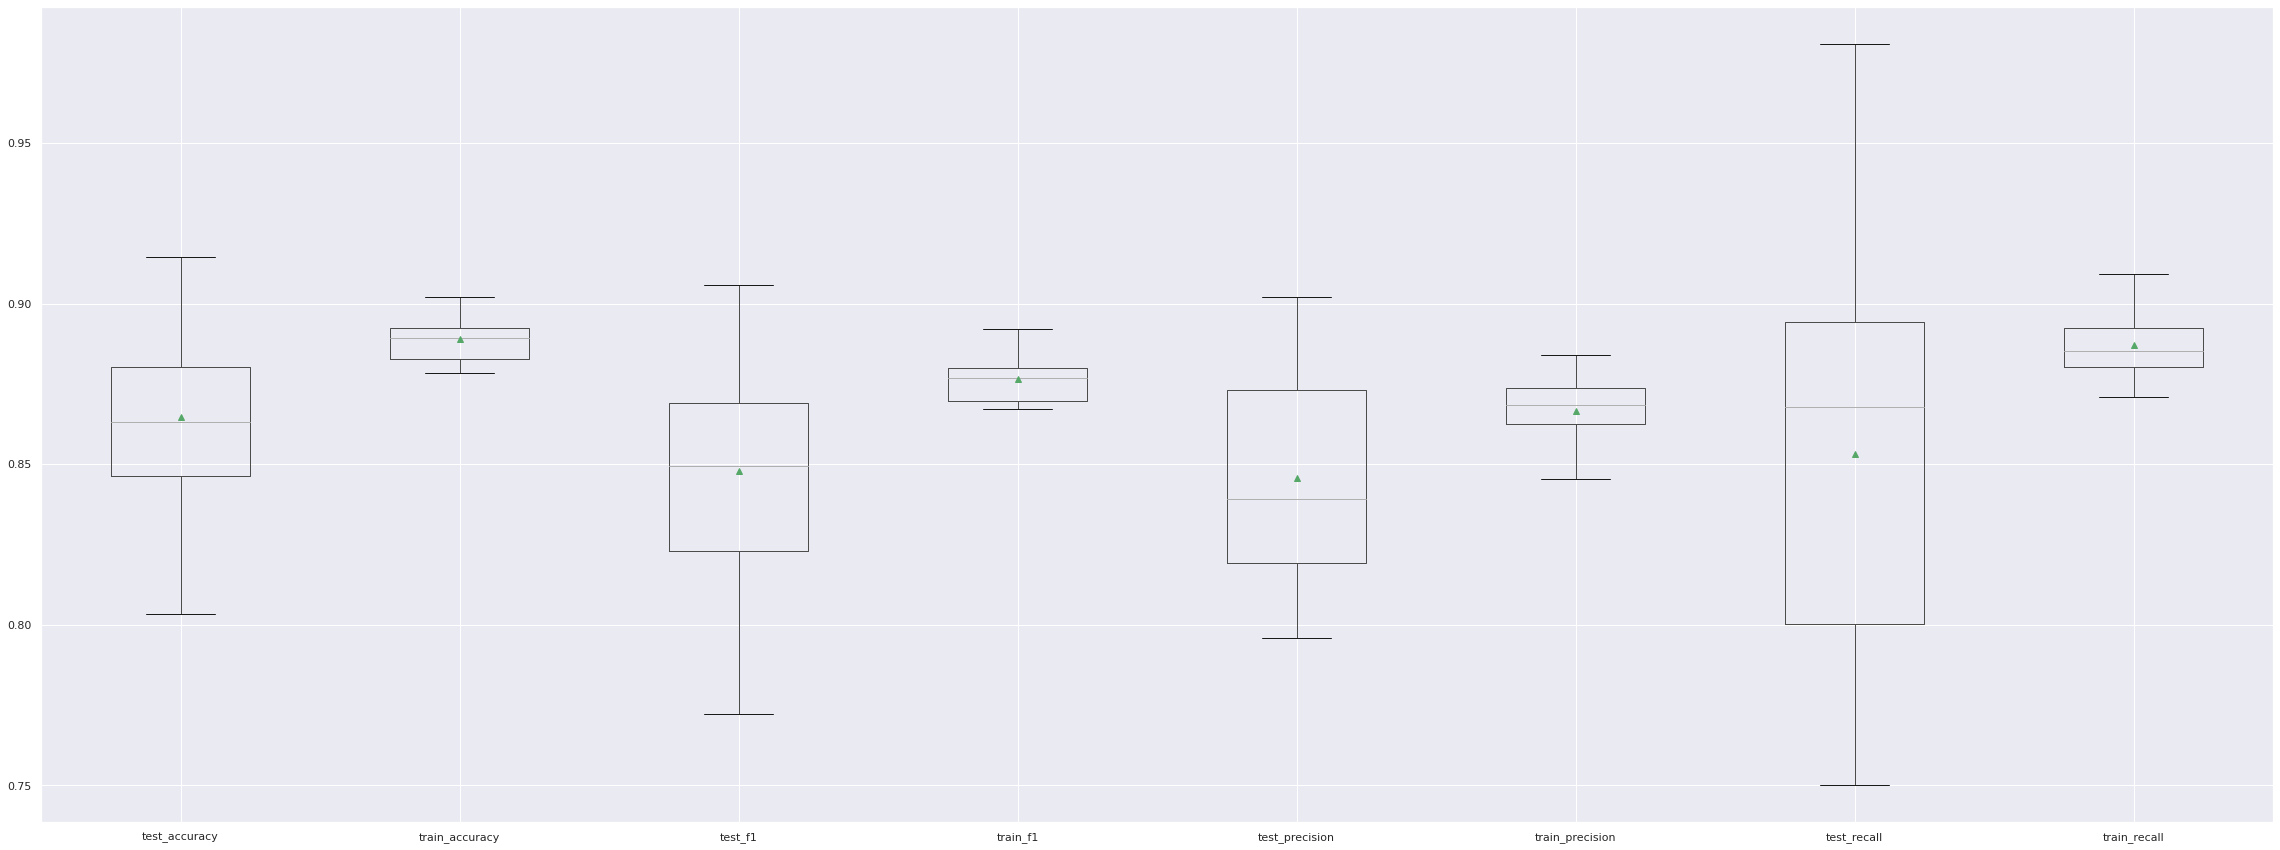

In [ ]:
df_resulsts = pd.DataFrame(scores_results).drop(['fit_time','score_time'],axis=1)
df_resulsts.boxplot(showmeans=True)

**Conclusiones**

Se identifican las distribuciones de las metricas de los datos validación y entrenamiento para el mejor modelo. 

En general, para todas las metricas, los datos de validación presentan una amplia distribución, lo que implica una alta variablidad. Adicional, para los datos de entrenamiento la variabilidad es menor. 

Por ultimo, en promedio todas las metricas tienen un buen valor o comportamiento, mayor al 85%, y las metricas de los datos entrenamiento tienen un mejor comportamiento a comparación de las metricas de los datos de validación. 

#**Ejercicio-6.**

In [ ]:
def plot_learning_curve(model,X,y,score):
    delta_train_sz = np.linspace(0.4, 1.0, 20)
    
    train_sizes, train_scores, valid_scores = learning_curve(estimator=model, 
                                                        X=X, 
                                                        y=y,
                                                        cv=5, 
                                                        train_sizes=delta_train_sz,
                                                        scoring = score)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

    plt.plot(train_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

    plt.title('Función learning_curve()')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel(score)
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()


def plot_hiper_validation(model,X,y,parameter,values,scoring = "f1"):
    train_scores, valid_scores = validation_curve(model, 
                                              X, 
                                              y, 
                                              param_name=parameter, 
                                              param_range=values,
                                              cv=5,
                                              scoring=scoring)


    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)
    # Curva de entrenamiento con la métrica de exactitud (accuracy):
    plt.plot(values, train_mean, color='blue', marker='o', markersize=5, label='Training')

    # Curva de validación:
    plt.plot(values, valid_mean, color='red', marker='o', markersize=5, label='Validation')

    plt.title('Función validation_curve()')
    plt.xlabel('Valores del parámetro '+ parameter)
    plt.ylabel(f'{scoring} score')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()


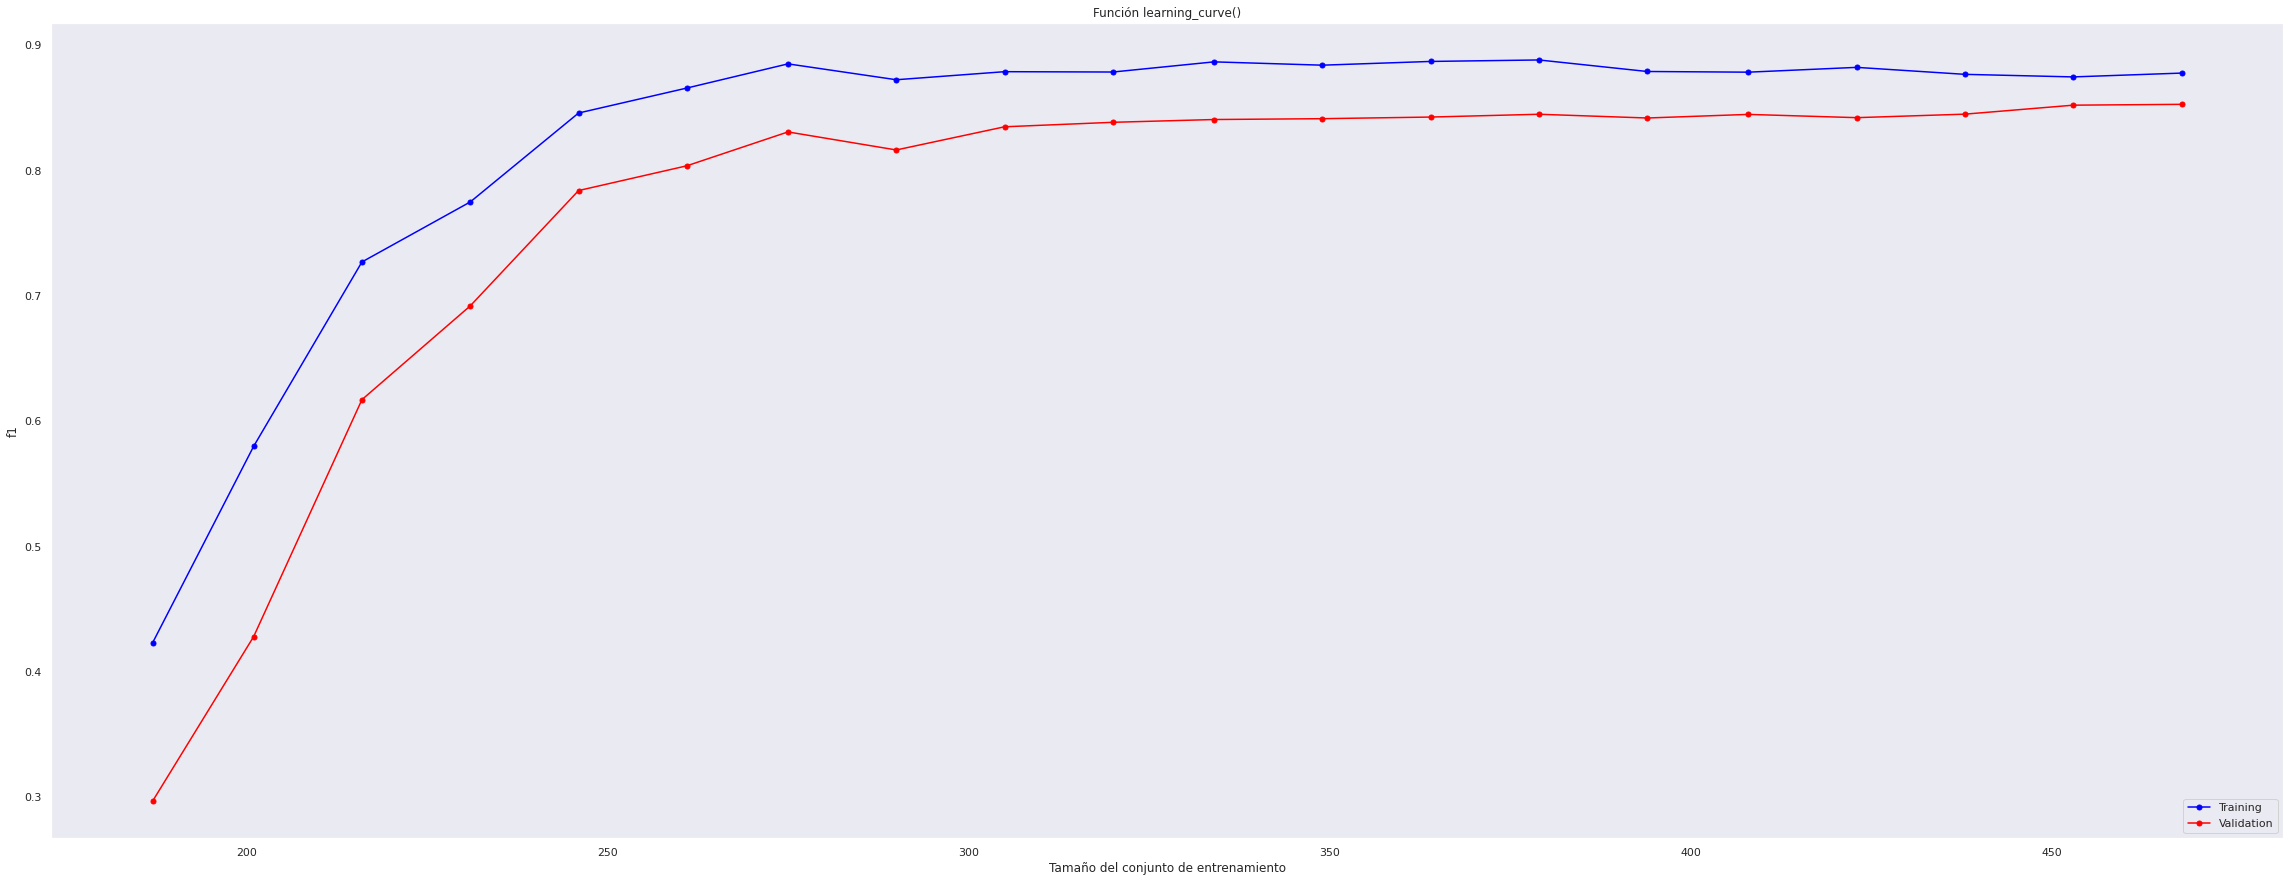

In [ ]:
plot_learning_curve(best_model,X_train,y_train, 'f1')

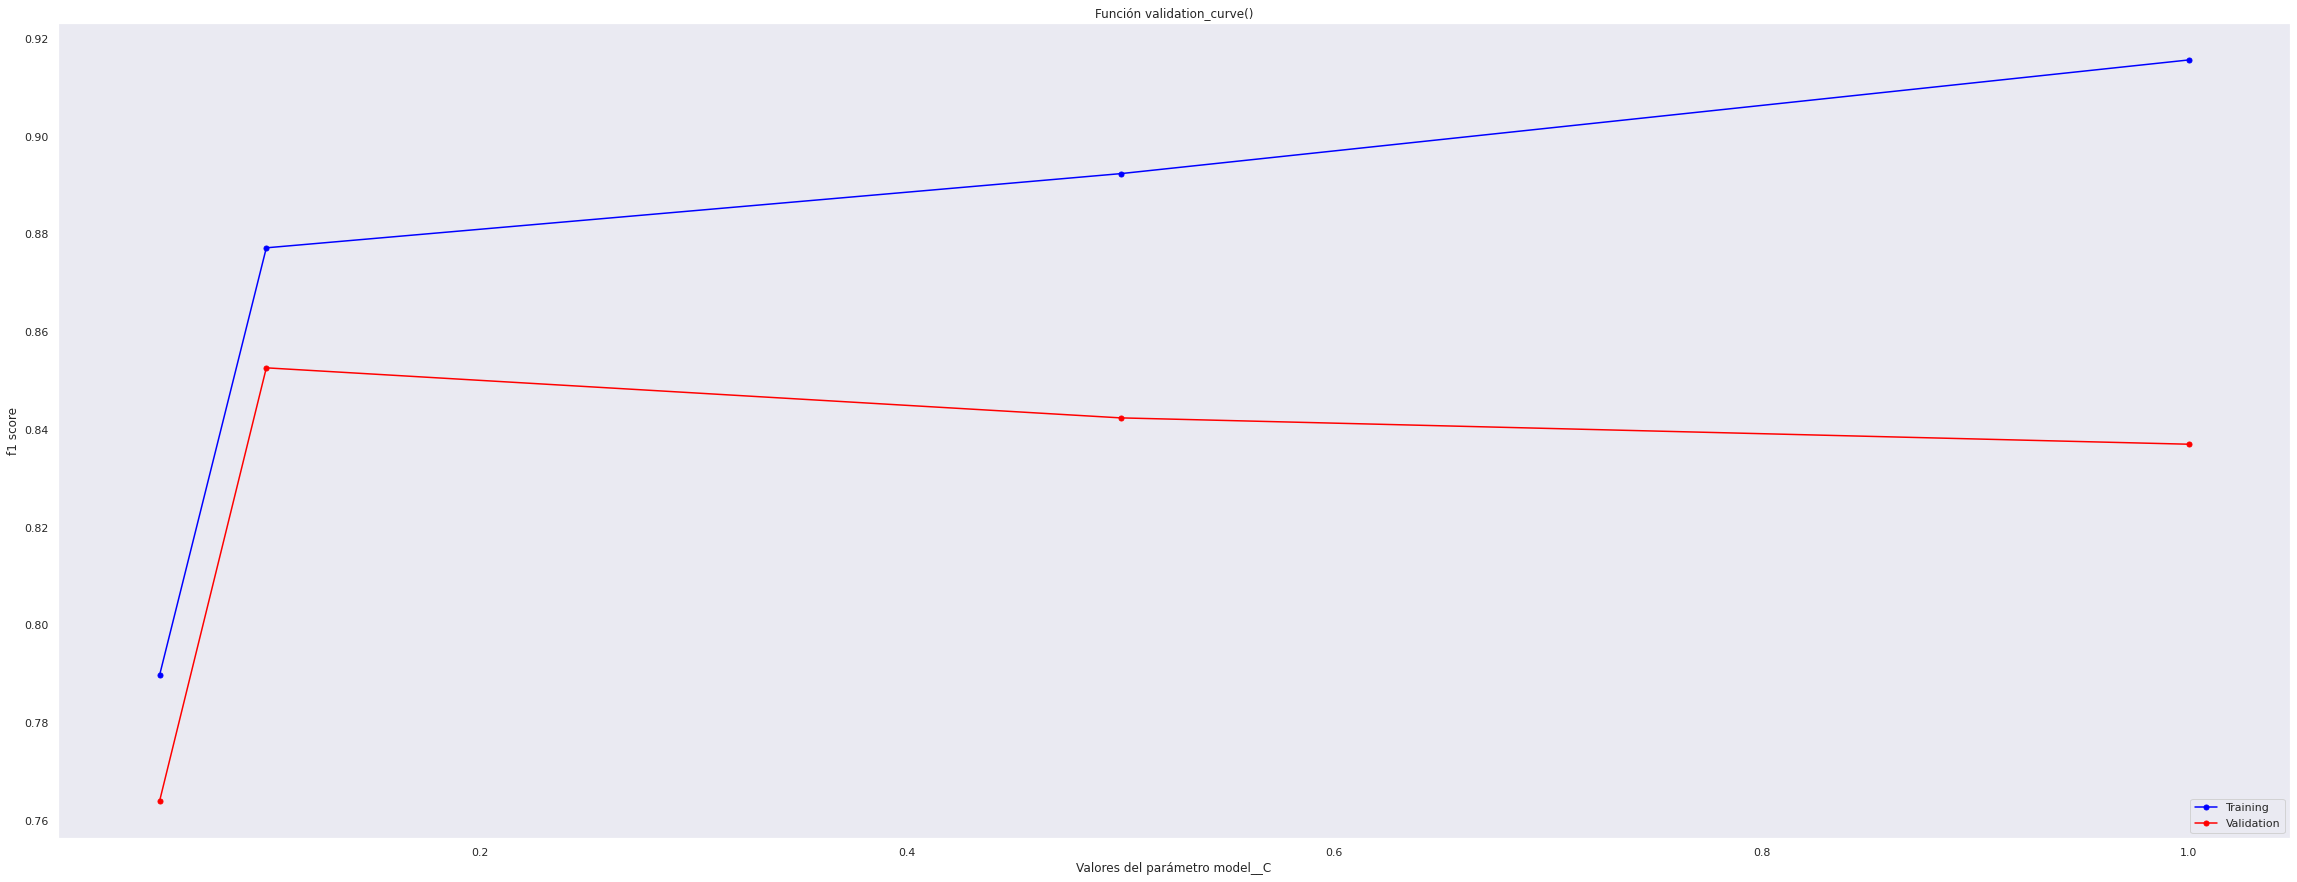

In [ ]:
plot_hiper_validation(best_model,X_train,y_train, 'model__C',[0.05,0.1,0.5, 1])

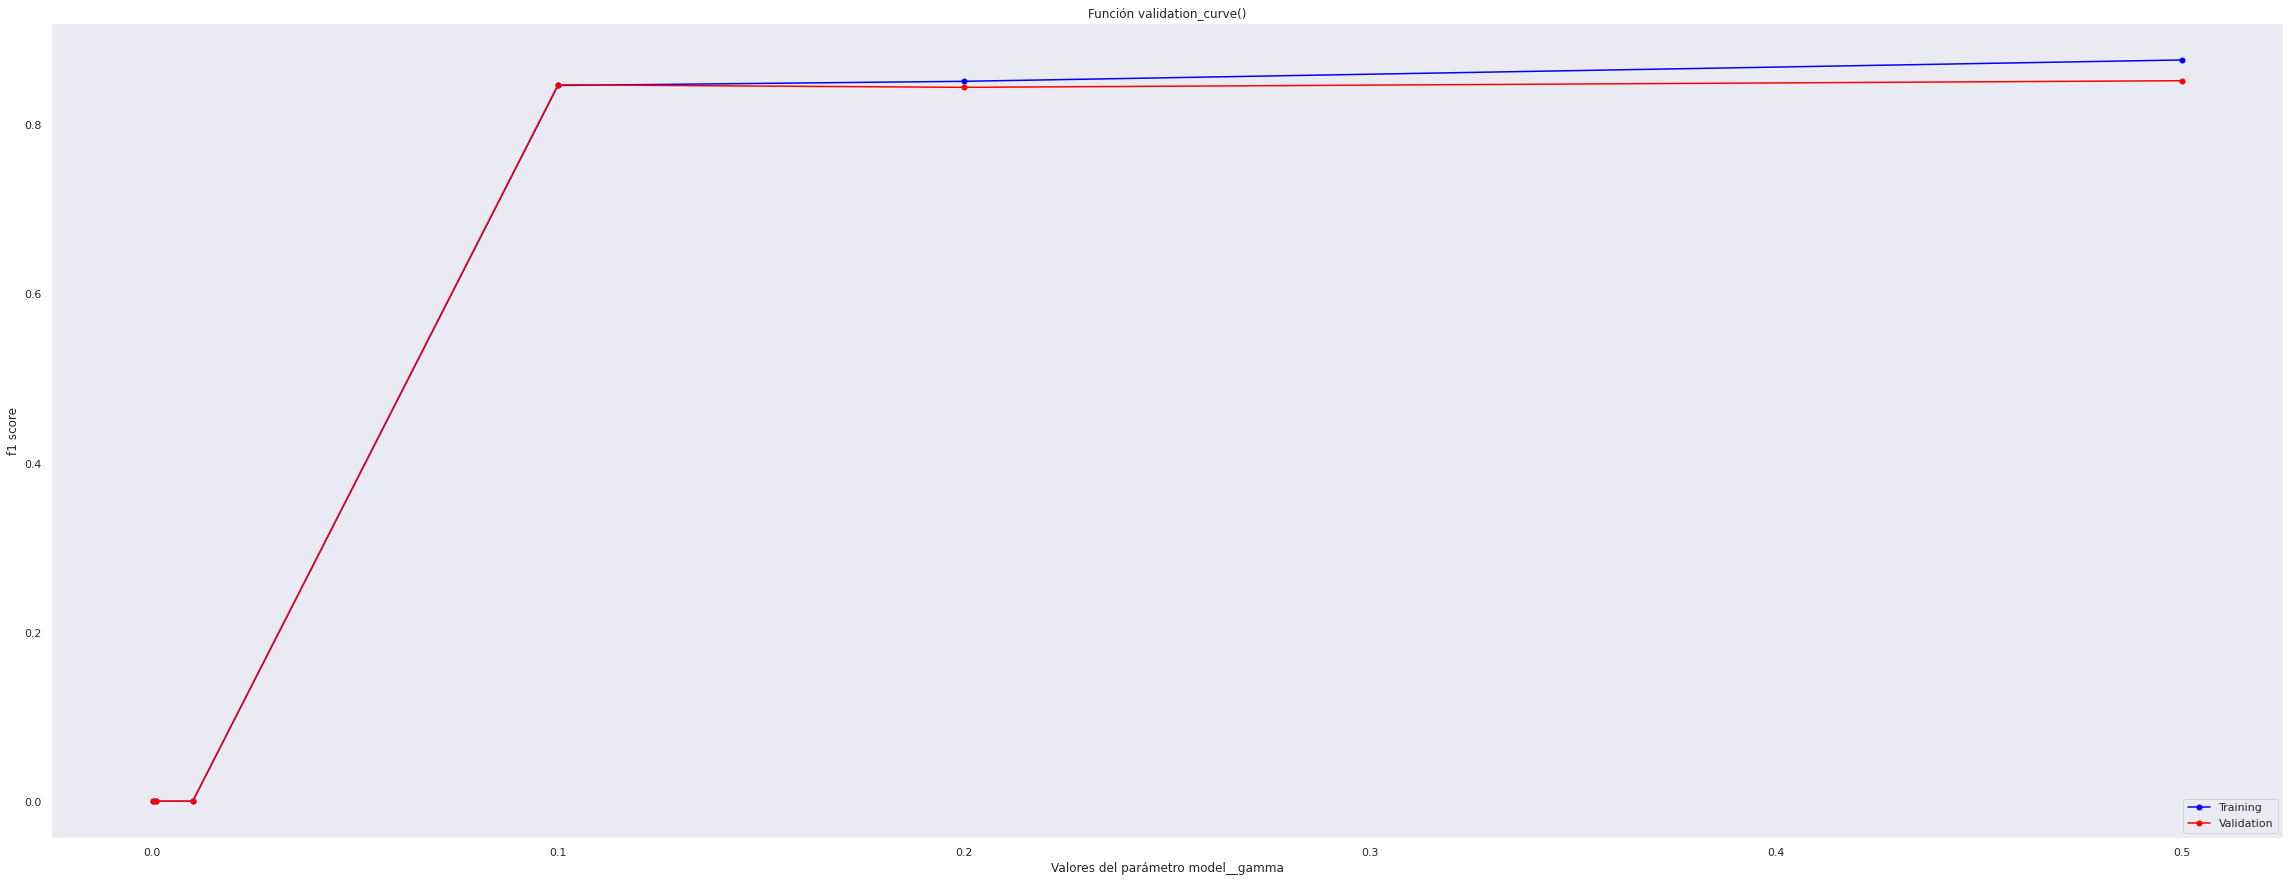

In [ ]:
plot_hiper_validation(best_model,X_train,y_train, 'model__gamma',[0.0001, 0.001, 0.01, 0.1,0.2,0.5])

De acuerdo a la curva de aprendizaje, se identifica que el modelo no tiene problemas de subentrenamiento y sobrenetrenamiento. Sin embargo, se realizan algunas modificaciones y se nota que cambiando los parametros en la curva de validación no mejora el modelo. 

#**Ejercicio-7.**

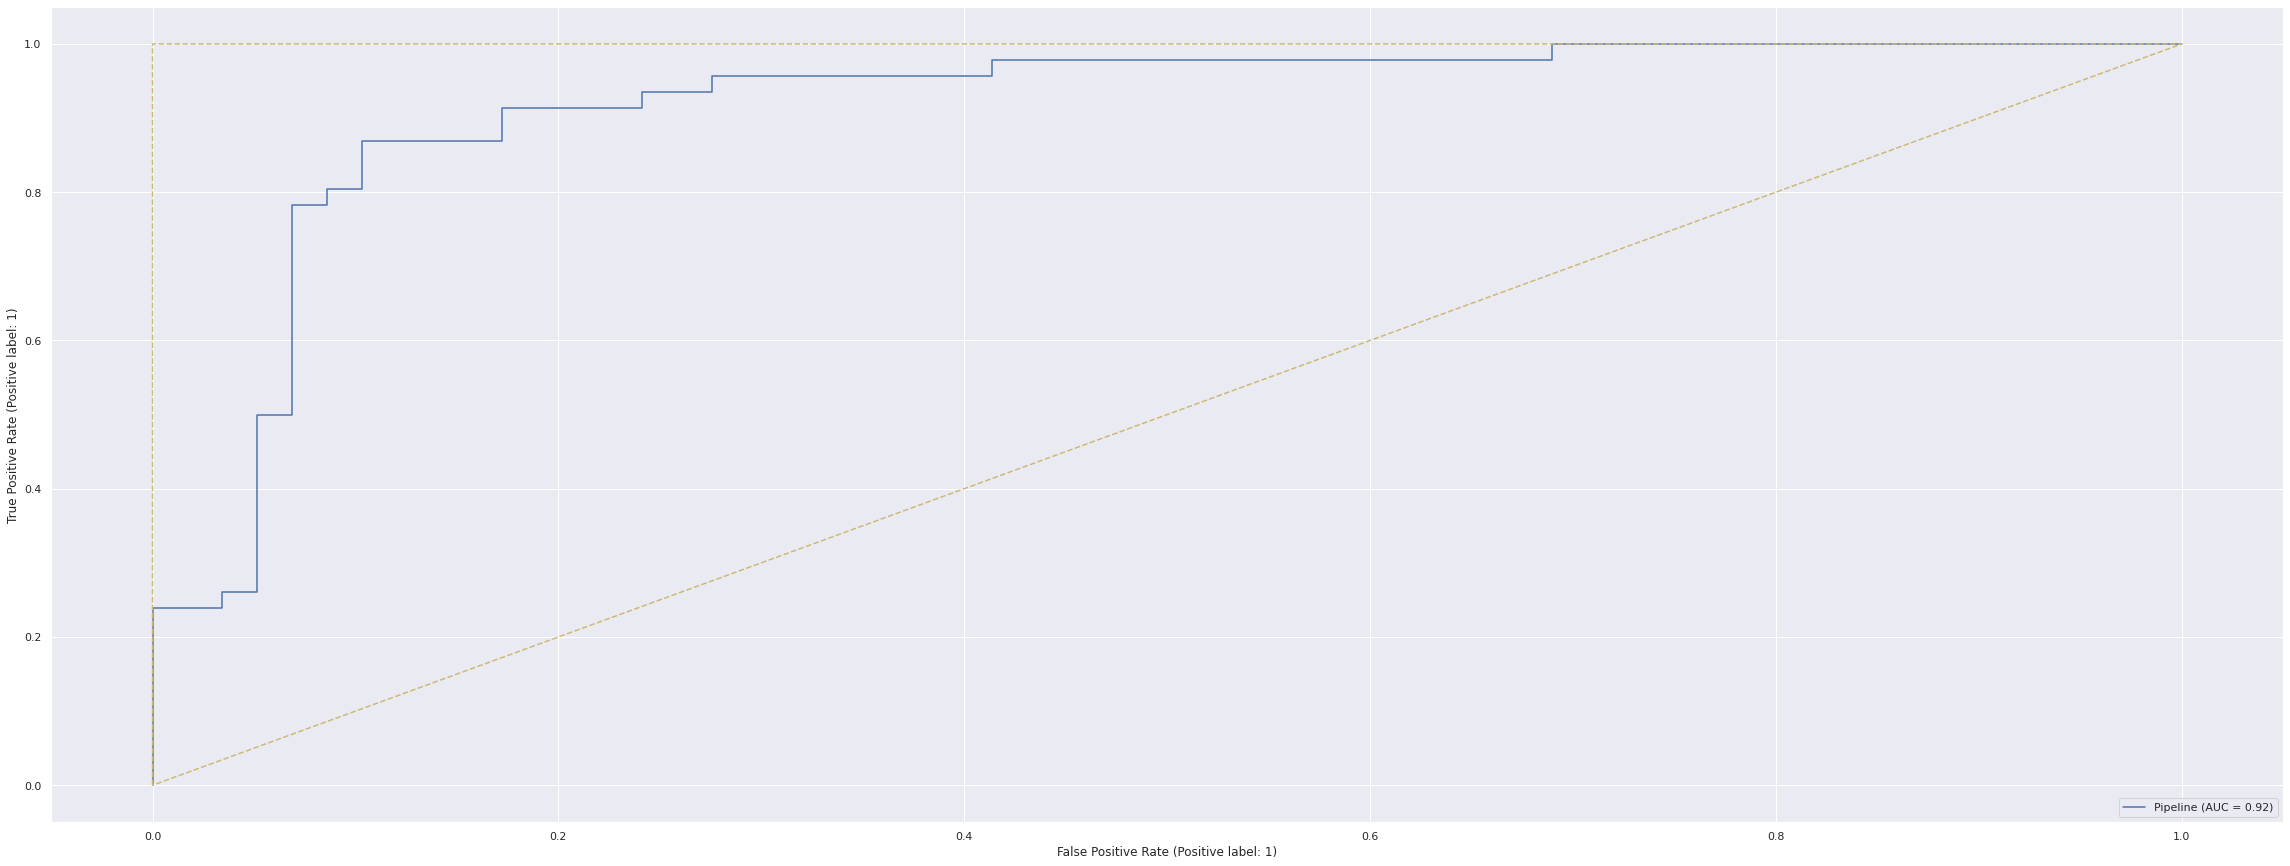

In [ ]:
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')

#**Ejercicio-8.**

In [ ]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')
yhat = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = yhat[:, 1]
# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.250, F-Score=0.86957


#**Ejercicio-9.**

In [ ]:
yhat = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = yhat[:, 1]
# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [geometric_mean_score(y_test, to_labels(probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, Gmean-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.250, Gmean-Score=0.88296


#**Ejercicio-10.**

**Conclusiones:**

Dado que el modelo SVM no esta ni subentrenado ni sobrenetrenado con la validaciones previas, y de acuerdo con los resultados de los puntos 8 y 9 se decide usar un Treshold de 0.25 ya que los limites de los resultados de F1-score y Gmean son muy cercanos y este valor optimizaría las metricas.  